# Assignment 2 - Plotting Weather Patterns

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

# Fisrt we importing and preparig the data

In [2]:
w_data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#Removing al Feburary 29th data
w_data = w_data[w_data['Date'].str.slice(5) != '02-29']
w_data['ID'] = w_data['ID'].apply(str) 
w_data['Date'] = pd.to_datetime(w_data['Date']).apply(lambda x: x.strftime('%Y-%m-%d'))
w_data['Data_Value'] = w_data['Data_Value'].apply(int)

max_temp = w_data[['Date','Data_Value']][w_data['Element'] == 'TMAX']
max_temp = max_temp.groupby('Date', as_index=False).max()
max_temp.columns = ['Date','Max']

min_temp = w_data[['Date','Data_Value']][w_data['Element'] == 'TMIN']
min_temp = min_temp.groupby('Date', as_index=False).min()
min_temp.columns = ['Date','Min']


temps = min_temp.merge(max_temp, how = 'inner', on = 'Date')
temps.describe()

,Min,Max
count,4015.000000,4015.000000
mean,0.313076,184.963885
std,103.613932,114.240415
min,-343.000000,-121.000000
25%,-72.000000,89.000000
50%,0.000000,200.000000
75%,89.000000,283.000000
max,217.000000,406.000000


## Ploting daily maximum and minimum

<IPython.core.display.Javascript object>


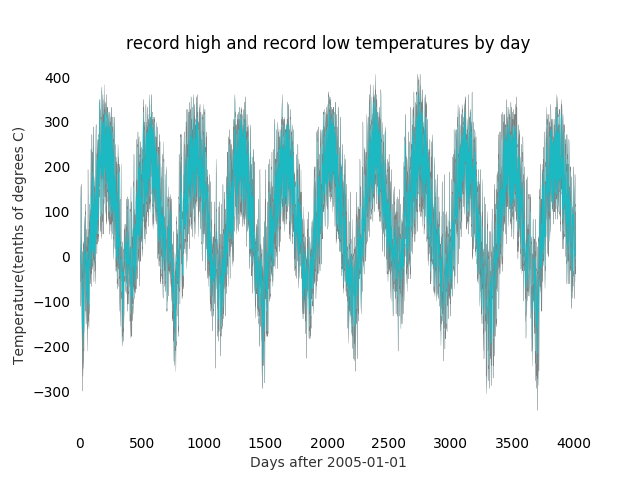

In [3]:
%matplotlib notebook
import numpy as np
t_day = plt.figure('Temperatures')
 
x = np.linspace(1,len(temps),num = len(temps))

plt.plot(x,temps['Max'],linewidth=.2,c = 'gray')

plt.plot(x,temps['Min'],linewidth=.2,c = 'gray')

plt.gca().fill_between(x,
                       temps['Min'],
                       temps['Max'],
                       facecolor = '#1DB9C3',
                       alpha= 1)
plt.title('record high and record low temperatures by day')
plt.ylabel('Temperature(tenths of degrees C) ', alpha=0.8)
plt.xlabel('Days after 2005-01-01', alpha=0.8)
plt.xlim(0,len(temps))

for spine in plt.gca().spines.values():
    spine.set_visible(False)

    # remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')


# Expeting a less "crowded" plot, lets plot it grouping by month

In [4]:
w_data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#Removing al Feburary 29th data
w_data = w_data[w_data['Date'].str.slice(5) != '02-29']
#w_data = w_data[w_data['Date'].str.slice(0,4) == '2014']

w_data['ID'] = w_data['ID'].apply(str) 
w_data['Date'] = pd.to_datetime(w_data['Date']).apply(lambda x: x.strftime('%Y-%m'))
w_data['Data_Value'] = w_data['Data_Value'].apply(int)

max_temp = w_data[['Date','Data_Value']][w_data['Element'] == 'TMAX']
max_temp = max_temp.groupby('Date', as_index=False).max()
max_temp.columns = ['Date','Max']

min_temp = w_data[['Date','Data_Value']][w_data['Element'] == 'TMIN']
min_temp = min_temp.groupby('Date', as_index=False).min()
min_temp.columns = ['Date','Min']


temps_month = min_temp.merge(max_temp, how = 'inner', on = 'Date')
temps_month.head()

,Date,Min,Max
0,2005-01,-300,161
1,2005-02,-211,117
2,2005-03,-211,239
3,2005-04,-67,289
4,2005-05,-61,294


<IPython.core.display.Javascript object>


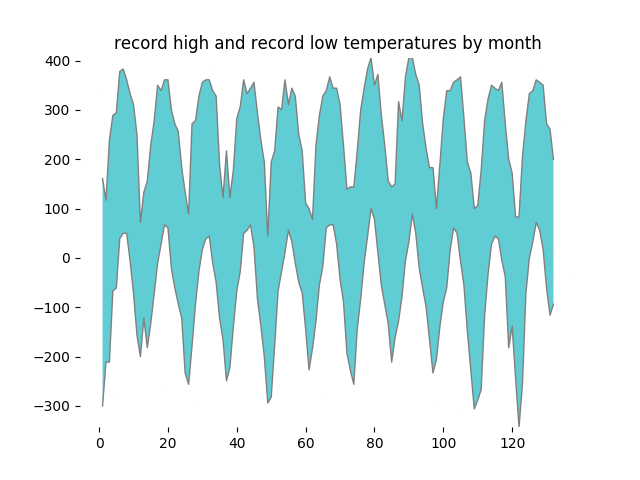

In [5]:
t_month = plt.figure('Temperatures_month')
 
x = np.linspace(1,len(temps_month),num = len(temps_month))

plt.plot(x,temps_month['Max'],linewidth=1,c = 'gray')

plt.plot(x,temps_month['Min'],linewidth=1,c = 'gray')

plt.gca().fill_between(x,
                       temps_month['Min'],
                       temps_month['Max'],
                       facecolor = '#1DB9C3',
                       alpha=0.7)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.ylim([min(temps_month['Min']),max(temps_month['Max'])])

plt.title('record high and record low temperatures by month')

# Now, lets compare the max/min temperatures thoughout 2015 with its equivalents in other years

In [6]:
#Splitting tthe datasets
temps['Year'] = pd.to_datetime(temps['Date']).apply(lambda x: x.strftime('%Y')).apply(int)
temps['Day-Month'] = pd.to_datetime(temps['Date']).apply(lambda x: x.strftime('%m-%d'))
temps_hist = temps[temps['Year'] < 2015]
temps_2015 = temps[temps['Year'] == 2015]

#Grouping ny day of the month
temps_min = temps_hist.groupby('Day-Month').min()['Min'].reset_index()
temps_max = temps_hist.groupby('Day-Month').max()['Max'].reset_index()

#Creating final dataset of histirical records
temps_record = temps_min.merge(temps_max, how='inner', on = 'Day-Month')
temps_record.columns = ['Day-Month','R_min','R_max']
temps_record.head(5)

,Day-Month,R_min,R_max
0,01-01,-160,156
1,01-02,-267,139
2,01-03,-267,133
3,01-04,-261,106
4,01-05,-150,128


In [7]:
#Compraring temperatures from 2015
temps_2015 = temps[temps['Year'] == 2015]
temps_2015 = temps_2015.merge(temps_record, how='inner', on = 'Day-Month')
temps_2015 = temps_2015.loc[:,['Day-Month','Min','Max','R_min','R_max']]
temps_2015["new_min"] = temps_2015.apply(lambda x: 'y' if x['Min'] - x['R_min'] < 0 else 'n', axis = 1)
temps_2015["new_max"] = temps_2015.apply(lambda x: 'y' if x['Max'] - x['R_max'] > 0 else 'n', axis = 1)

#creating min/max datasets
new_min = temps_2015[temps_2015["new_min"] == 'y'].loc[:,['Day-Month','Min']]
new_max = temps_2015[temps_2015["new_max"] == 'y'].loc[:,['Day-Month','Max']]
new_min.columns = ['Day-Month','new min']
new_max.columns = ['Day-Month','new max']

#adding columns to the records datasert
temps_record = temps_record.merge(new_min,how = 'left', on = 'Day-Month')
temps_record = temps_record.merge(new_max,how = 'left', on = 'Day-Month')
temps_record.head()

,Day-Month,R_min,R_max,new min,new max
0,01-01,-160,156,NaN,NaN
1,01-02,-267,139,NaN,NaN
2,01-03,-267,133,NaN,NaN
3,01-04,-261,106,NaN,NaN
4,01-05,-150,128,-155.0,NaN


# Our final plot

<IPython.core.display.Javascript object>


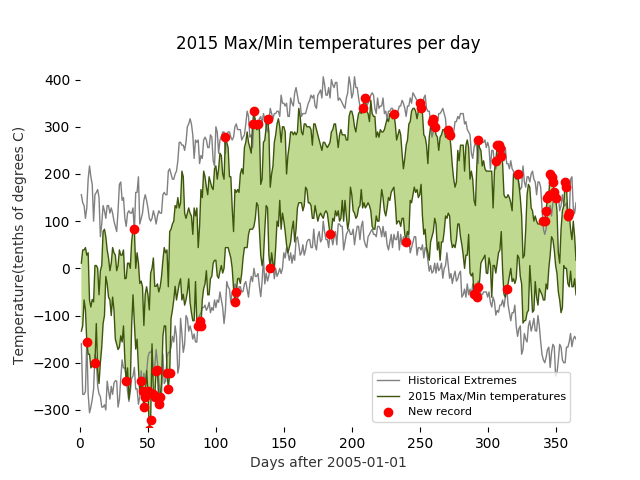

In [8]:
t_records = plt.figure('Temperatures_records_2015')
 
x = np.linspace(1,len(temps_record),num = len(temps_record))

plt.plot(x,temps_record['R_max'],linewidth=1,c = 'gray')
plt.plot(x,temps_record['R_min'],linewidth=1,c = 'gray',label='_nolegend_')

plt.plot(x,temps_2015['Max'],linewidth=1,c = '#3D550C')
plt.plot(x,temps_2015['Min'],linewidth=1,c = '#3D550C',label='_nolegend_')

plt.gca().fill_between(x,
                       temps_2015['Min'],
                       temps_2015['Max'],
                       facecolor = '#81B622',
                       alpha= .5,
                      label='_nolegend_')

plt.scatter(x,temps_record['new min'],c='r',zorder=3)
plt.scatter(x,temps_record['new max'],c='r',zorder=3,label='_nolegend_')


#Adjusting chat visual

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.ylim([min(temps_record['R_min'])*1.1,max(temps_record['R_max'])*1.1])

plt.title('2015 Max/Min temperatures per day')
plt.ylabel('Temperature(tenths of degrees C) ', alpha=0.8)
plt.xlabel('Days after 2005-01-01', alpha=0.8)
plt.xlim(0,len(temps_record))

# for spine in plt.gca().spines.values():
#     spine.set_visible(False)

    # remove all the ticks (both axes), and tick labels on the Y axis
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
plt.legend(['Historical Extremes', '2015 Max/Min temperatures', 'New record'], loc =4,fontsize = 8)
plt.savefig("Temperatures.png")
